In [34]:
import torch.nn as nn
from torch.nn import MaxPool2d, AvgPool2d
import torch
from torchvision import transforms
import os
os.chdir('/home/ppathak/Praddy_CSC578/detectron2')
transform = transforms.ToTensor()

In [2]:
from detectron2.data.datasets import register_coco_instances
# register_coco_instances("my_val_dataset", {}, "../datasets/coco/annotations/filtered_instances_val2017.json", "../datasets/coco/val2017")
register_coco_instances("coco_train_dog", {}, "../datasets/coco/annotations/dog_instances_train2017.json", "../datasets/coco/train2017_dog")
register_coco_instances("coco_val_dog", {}, "../datasets/coco/annotations/dog_instances_val2017.json", "../datasets/coco/val2017_dog")

(400, 500, 3)


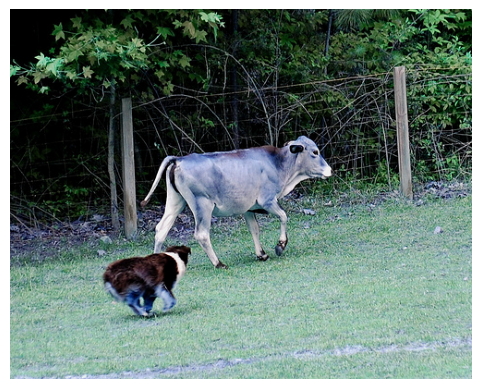

In [46]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

img_name = random.choice(os.listdir('/home/ppathak/Praddy_CSC578/datasets/coco/train2017_dog'))
img = cv2.imread(f"/home/ppathak/Praddy_CSC578/datasets/coco/train2017_dog/{img_name}")
print(img.shape)
plt.imshow(img)
plt.axis("off")
plt.show()


torch.Size([1, 3, 80, 80])


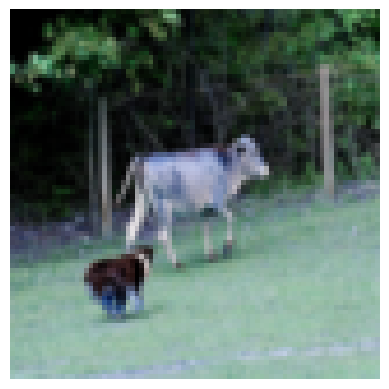

In [50]:
# image_tensor = torch.tensor(img).permute(2, 0, 1).unsqueeze(0).float()
image_tensor = transform(img).unsqueeze(0)
max_pool = AvgPool2d(kernel_size=(5, 5), stride=2, padding=0)
adaptive_pool = nn.AdaptiveAvgPool2d((80, 80))

pooled_img = max_pool(image_tensor)
# pooled_img = max_pool(pooled_img)
pooled_img = adaptive_pool(pooled_img)
print(pooled_img.shape)
pooled_image = pooled_img.squeeze(0).detach().cpu().numpy()
pooled_image = pooled_image.transpose(1, 2, 0)
# print(pooled_output_np.shape)
# pooled_output_np = pooled_output_np.transpose(1, 2, 0)
plt.imshow(pooled_image)  # Use cmap='gray' for grayscale
plt.axis('off')  # Remove axis for a cleaner look
plt.show()